In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("combined_data_20211217.csv")

/Users/stlp/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (36,37,38,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns

Index(['Unnamed: 0', 'date', 'headline', 'message_x', 'link', 'domain',
       'rating', 'orientation', 'sourceEchochamber', 'actualangryCount',
       'actualcareCount', 'actualcommentCount', 'actualhahaCount',
       'actuallikeCount', 'actualloveCount', 'actualsadCount',
       'actualshareCount', 'actualthankfulCount', 'actualwowCount',
       'expectedangryCount', 'expectedcareCount', 'expectedcommentCount',
       'expectedhahaCount', 'expectedlikeCount', 'expectedloveCount',
       'expectedsadCount', 'expectedshareCount', 'expectedthankfulCount',
       'expectedwowCount', 'id', 'name', 'score', 'domainName', 'u_id',
       'emotion', 'uid', 'sentiment', 'positive_confidence',
       'neutral_confidence', 'negative_confidence', 'opinions',
       'sentence_sentiments', 'ads_domain_total_count', 'ads_TAG_count',
       'ads_highest_count', 'ads_domain_with_highest_count',
       'topic_monthly_pageviews', 'newsguard_parent_domain',
       'newsguard_rating', 'newsguard_avg_score

## Exploration: TNR vs confidence score

In [3]:
df1 = df[['positive_confidence', 'rating', 'neutral_confidence', 'negative_confidence', 'ads_domain_total_count']]
df1

,positive_confidence,rating,neutral_confidence,negative_confidence,ads_domain_total_count
0,ERROR,N,ERROR,ERROR,402.0
1,0.47,T,0.14,0.39,20.0
2,0.01,T,0.01,0.98,1957.0
3,ERROR,T,ERROR,ERROR,127.0
4,ERROR,T,ERROR,ERROR,482.0
...,...,...,...,...,...
911813,NaN,T,NaN,NaN,10.0
911814,NaN,T,NaN,NaN,54.0
911815,NaN,T,NaN,NaN,NaN
911816,NaN,T,NaN,NaN,10.0


In [4]:
df1 = df1[df1.positive_confidence != "ERROR"]
df1 = df1[df1['positive_confidence'].notna()]

df1 = df1[df1.neutral_confidence != "ERROR"]
df1 = df1[df1['neutral_confidence'].notna()]

df1 = df1[df1.negative_confidence != "ERROR"]
df1 = df1[df1['negative_confidence'].notna()]

df1

,positive_confidence,rating,neutral_confidence,negative_confidence,ads_domain_total_count
1,0.47,T,0.14,0.39,20.0
2,0.01,T,0.01,0.98,1957.0
8,0.9,T,0.07,0.03,203.0
10,0.13,T,0.67,0.2,468.0
13,0.0,N,0.02,0.98,54.0
...,...,...,...,...,...
882873,0.2,T,0.78,0.02,NaN
882876,0.15,T,0.82,0.03,NaN
882877,0.05,T,0.94,0.01,141.0
882878,0.0,T,0.0,1.0,52.0


In [14]:
df1["positive_confidence"] = pd.to_numeric(df1["positive_confidence"])
df1["neutral_confidence"] = pd.to_numeric(df1["neutral_confidence"])
df1["negative_confidence"] = pd.to_numeric(df1["negative_confidence"])

In [16]:
t_pos = df1.loc[df1['rating'] == 'T', 'positive_confidence'].mean()
t_pos

0.19592836313510079

In [17]:
n_pos = df1.loc[df1['rating'] == 'N', 'positive_confidence'].mean()
n_pos

0.19941981432816883

In [18]:
r_pos = df1.loc[df1['rating'] == 'R', 'positive_confidence'].mean()
r_pos

0.17259874511421555

In [20]:
# assign data of lists.
data = {'rating': ['T', 'N', 'R'], 'positive_confidence': [t_pos, n_pos, r_pos]}
# Create DataFrame.
df2 = pd.DataFrame(data)
# Print the output.
print(df2)

  rating  positive_confidence
0      T             0.195928
1      N             0.199420
2      R             0.172599


In [21]:
t_neu = df1.loc[df1['rating'] == 'T', 'neutral_confidence'].mean()
n_neu = df1.loc[df1['rating'] == 'N', 'neutral_confidence'].mean()
r_neu = df1.loc[df1['rating'] == 'R', 'neutral_confidence'].mean()

In [23]:
data = {'rating': ['T', 'N', 'R'], 'neutral_confidence': [t_neu, n_neu, r_neu]}
# Create DataFrame.
dfp = pd.DataFrame(data)
# Print the output.
print(dfp)

  rating  neutral_confidence
0      T            0.323164
1      N            0.344738
2      R            0.383395


In [24]:
df2['neutral_confidence'] = dfp['neutral_confidence']
df2

,rating,positive_confidence,neutral_confidence
0,T,0.195928,0.323164
1,N,0.199420,0.344738
2,R,0.172599,0.383395


In [25]:
t_neg = df1.loc[df1['rating'] == 'T', 'negative_confidence'].mean()
n_neg = df1.loc[df1['rating'] == 'N', 'negative_confidence'].mean()
r_neg = df1.loc[df1['rating'] == 'R', 'negative_confidence'].mean()

data = {'rating': ['T', 'N', 'R'], 'negative_confidence': [t_neg, n_neg, r_neg]}
# Create DataFrame.
dfp = pd.DataFrame(data)
# Print the output.
print(dfp)

  rating  negative_confidence
0      T             0.480907
1      N             0.455842
2      R             0.444007


In [26]:
df2['negative_confidence'] = dfp['negative_confidence']
df2

,rating,positive_confidence,neutral_confidence,negative_confidence
0,T,0.195928,0.323164,0.480907
1,N,0.199420,0.344738,0.455842
2,R,0.172599,0.383395,0.444007


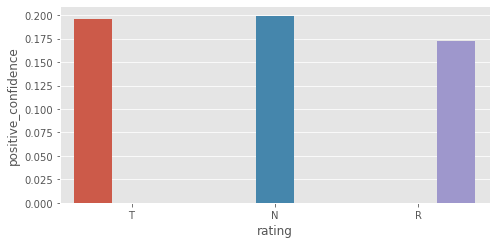

In [42]:
sns.barplot(x ='rating', y ='positive_confidence', data = df2, hue ='rating')
plt.legend([],[], frameon=False)

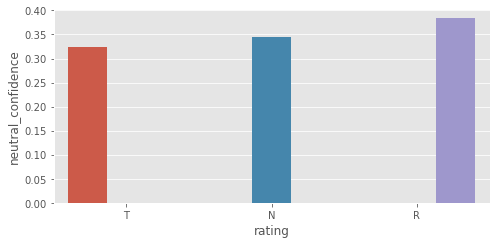

In [44]:
sns.barplot(x ='rating', y ='neutral_confidence', data = df2, hue ='rating')
plt.legend([],[], frameon=False)

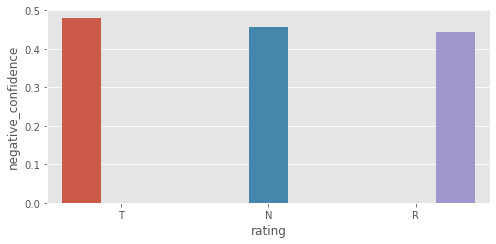

In [45]:
sns.barplot(x ='rating', y ='negative_confidence', data = df2, hue ='rating')
plt.legend([],[], frameon=False)

## Sentiment Confidence Score

Text(0.5, 1.0, 'Average negative_confidence')

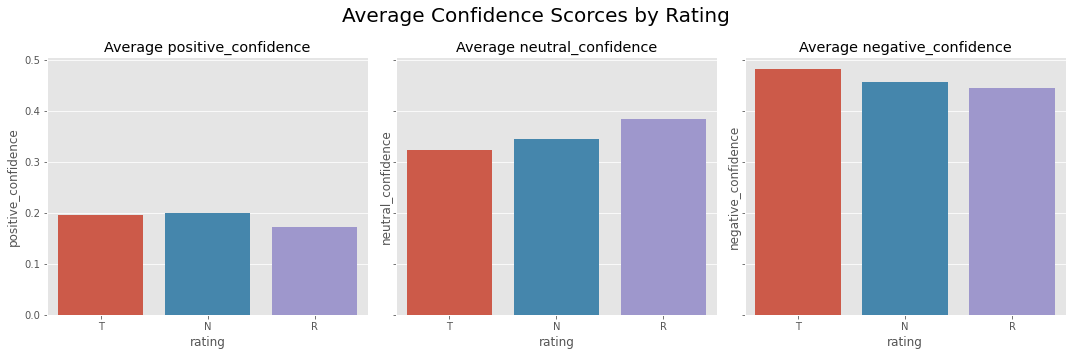

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True) 
fig.suptitle('Average Confidence Scorces by Rating', size=20)

# Bulbasaur
sns.barplot(ax=axes[0], x=df2.rating, y=df2.positive_confidence)
axes[0].set_title("Average positive_confidence")

# Charmander
sns.barplot(ax=axes[1], x=df2.rating, y=df2.neutral_confidence)
axes[1].set_title("Average neutral_confidence")

# Squirtle
sns.barplot(ax=axes[2], x=df2.rating, y=df2.negative_confidence)
axes[2].set_title("Average negative_confidence")